<h1 style="text-align: center;">Deep Learning<br><br>(RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [3]:
df = pd.read_csv('Frozen_Dessert_Production.csv',index_col='DATE', parse_dates = True)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [4]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPN31152N,573.000,109.896,27.951,58.660,88.936,107.643,128.278,196.174


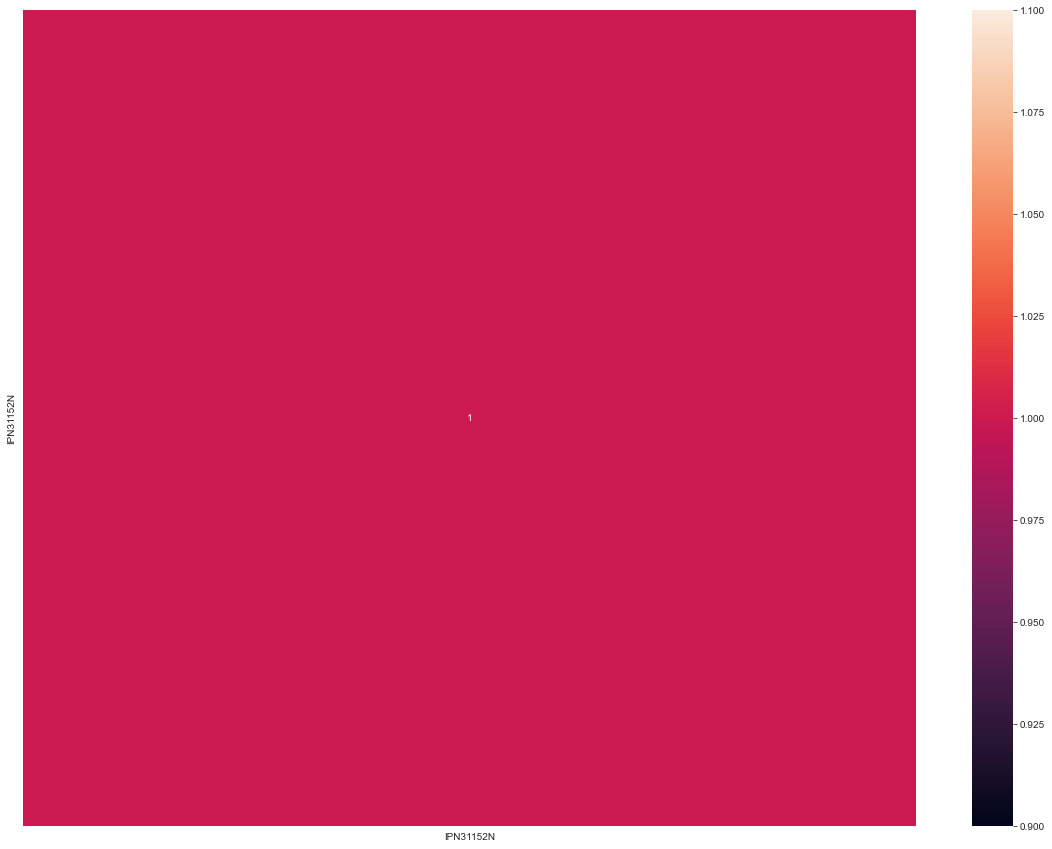

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

In [8]:
df.columns

Index(['IPN31152N'], dtype='object')

<AxesSubplot:xlabel='DATE'>

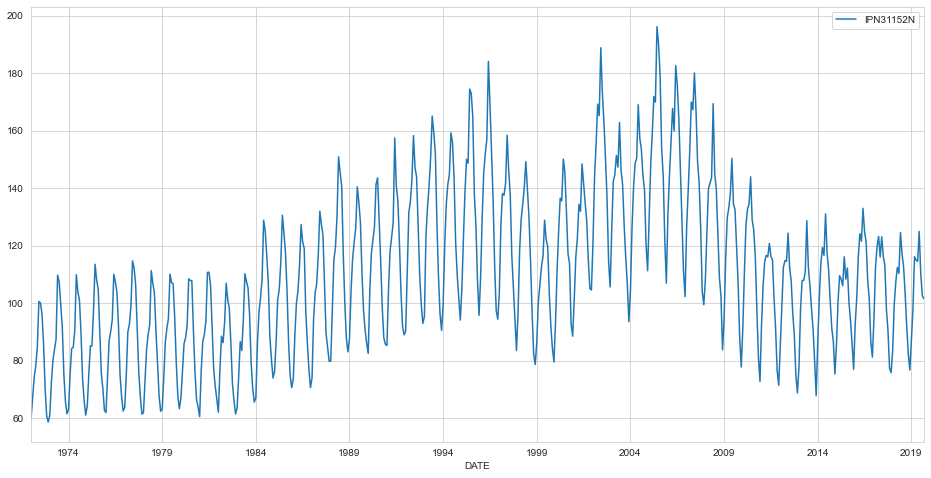

In [51]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [9]:
len(df)

573

In [45]:
test_months = 24

In [46]:
test_ind = len(df)- test_months
test_ind

549

In [12]:
test_ind

168

In [49]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [50]:
train.shape, test.shape

((549, 1), (24, 1))

## Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [56]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
length = 12 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(train_scaled, train_scaled, length=length, batch_size=batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length=length, batch_size=batch_size)

In [58]:
len(train_scaled), len(generator), len(test_scaled), len(validation_generator)

(549, 537, 24, 12)

# Modelling & Model Performance

## with "tanh" activation function

In [59]:
n_features = train_scaled.shape[1]

1

In [60]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [61]:
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True)

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Train for 537 steps, validate for 12 steps
Epoch 1/20
536/537 [============================>.] - ETA: 0s - loss: 0.0175

2022-07-04 20:03:31.341844: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_28825_specialized_for_sequential_2_lstm_2_StatefulPartitionedCall_at___inference_distributed_function_29621' and '__inference_standard_lstm_28825' both implement 'lstm_2715ea5c-b669-4dbf-a136-ba81d23d9a8a' but their signatures do not match.


537/537 [==============================] - 70s 130ms/step - loss: 0.0175 - val_loss: 0.0025
Epoch 2/20
537/537 [==============================] - 70s 129ms/step - loss: 0.0047 - val_loss: 0.0022
Epoch 3/20
537/537 [==============================] - 82s 153ms/step - loss: 0.0049 - val_loss: 0.0022
Epoch 4/20
537/537 [==============================] - 80s 149ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 5/20
537/537 [==============================] - 103s 192ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 6/20
537/537 [==============================] - 129s 241ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 7/20
537/537 [==============================] - 148s 276ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 8/20
537/537 [==============================] - 162s 302ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 9/20
537/537 [==============================] - 125s 233ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 10/20
537/537 [==============================] - 114s 213ms/step - loss: 

<AxesSubplot:>

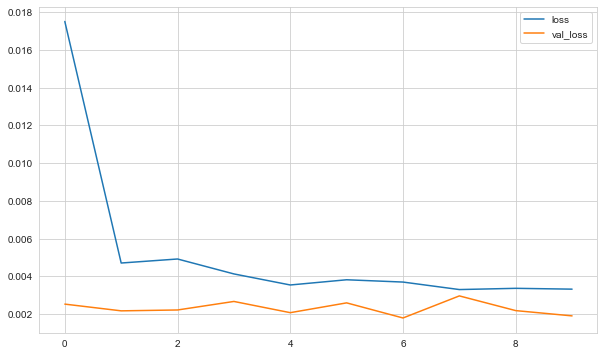

In [66]:
losses = pd.DataFrame(model.history.history)
losses.plot()

### Evaluation on Test Data

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [68]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [69]:
y_pred = model.predict(validation_generator) 

y_pred

2022-07-04 20:20:40.843975: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_39986' and '__inference_standard_lstm_39875_specialized_for_sequential_2_lstm_2_StatefulPartitionedCall_at___inference_distributed_function_40644' both implement 'lstm_ed05fa49-b6b1-43d2-9d27-afabc52cd169' but their signatures do not match.


array([[0.23345765],
       [0.1867371 ],
       [0.1722296 ],
       [0.18693951],
       [0.25842807],
       [0.33787787],
       [0.42951715],
       [0.45204076],
       [0.42974427],
       [0.41795477],
       [0.3332104 ],
       [0.24306548]], dtype=float32)

In [70]:
eval_metrics(test_scaled[-12:], y_pred)


r2_score: 0.8354842029165003 
 mae: 0.036309136269994734 
 mse: 0.001797772808877146 
 rmse: 0.0424001510478105


In [71]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

2022-07-04 20:20:49.244964: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_40890_specialized_for_sequential_2_lstm_2_StatefulPartitionedCall_at___inference_distributed_function_41661' and '__inference_cudnn_lstm_with_fallback_41001' both implement 'lstm_71295317-675b-48f2-86f5-d9c39871b317' but their signatures do not match.


### Inverse Transformation and Comparing

In [72]:
pred = scaler.inverse_transform(test_predictions)


In [73]:
test['Predictions'] = pred


In [74]:
test

,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,91.635
2017-11-01,77.438,88.507
2017-12-01,75.812,91.491
2018-01-01,83.434,98.456
2018-02-01,99.490,106.302
2018-03-01,107.315,112.943
2018-04-01,112.431,117.376
2018-05-01,110.354,118.809
2018-06-01,124.584,116.996


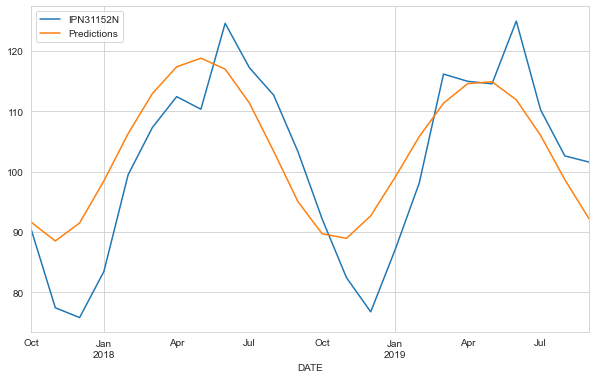

In [75]:
test.plot();


## with "relu" activation function

In [76]:
model1 = Sequential()
model1.add(LSTM(100, activation = 'relu', input_shape = (length, n_features))) 
model1.add(Dense(1))  
model1.compile(optimizer = 'adam', loss = 'mse')

In [77]:
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [78]:
model1.fit(x = generator,
          epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Train for 537 steps, validate for 12 steps
Epoch 1/20
537/537 [==============================] - 34s 64ms/step - loss: 0.0200 - val_loss: 0.0051
Epoch 2/20
537/537 [==============================] - 35s 65ms/step - loss: 0.0061 - val_loss: 0.0020
Epoch 3/20
537/537 [==============================] - 38s 70ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 4/20
537/537 [==============================] - 43s 80ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/20
537/537 [==============================] - 45s 84ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 6/20
537/537 [==============================] - 43s 80ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 7/20
537/537 [==============================] - 47s 87ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 8/20
537/537 [==============================] - 46s 86ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 9/20
537/537 [==============================] - 54s 100ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 10/20
537/537 [=================

<AxesSubplot:>

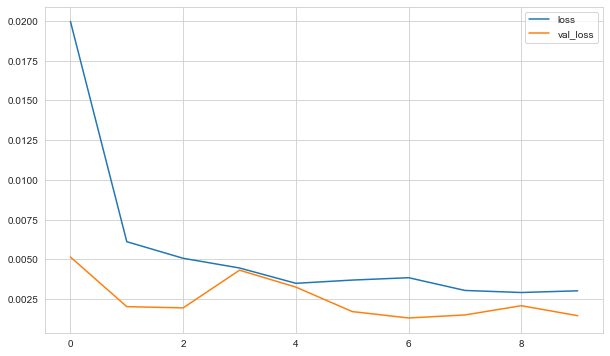

In [79]:
losses1 = pd.DataFrame(model1.history.history)
losses1.plot()

### Evaluation on Test Data

In [85]:
test_predictions1 = []

first_eval_batch = train_scaled[-length:]

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model1.predict(current_batch)[0]
    
    # store prediction
    test_predictions1.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [86]:
eval_metrics(test_scaled, test_predictions1)


r2_score: 0.5645230991644672 
 mae: 0.06378616792604982 
 mse: 0.005096678273634073 
 rmse: 0.07139102376093281


### Inverse Transformation and Comparing

In [87]:
pred1 = scaler.inverse_transform(test_predictions1)
test['Predictions'] = pred1
test


,IPN31152N,Predictions
DATE,,
2017-10-01,90.473,92.571
2017-11-01,77.438,87.567
2017-12-01,75.812,89.544
2018-01-01,83.434,99.027
2018-02-01,99.490,109.007
2018-03-01,107.315,115.767
2018-04-01,112.431,119.845
2018-05-01,110.354,119.653
2018-06-01,124.584,117.347


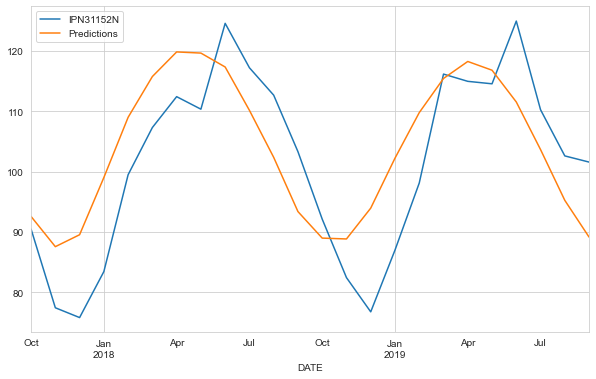

In [88]:
test.plot();


# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [89]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [90]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data,
                                length=length,
                                batch_size=1)

In [91]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=15)

Epoch 1/15
561/561 [==============================] - 130s 231ms/step - loss: 0.0226
Epoch 2/15
561/561 [==============================] - 141s 252ms/step - loss: 0.0071
Epoch 3/15
561/561 [==============================] - 140s 249ms/step - loss: 0.0059
Epoch 4/15
561/561 [==============================] - 152s 270ms/step - loss: 0.0053
Epoch 5/15
561/561 [==============================] - 151s 270ms/step - loss: 0.0047
Epoch 6/15
561/561 [==============================] - 151s 269ms/step - loss: 0.0050
Epoch 7/15
561/561 [==============================] - 149s 265ms/step - loss: 0.0038
Epoch 8/15
561/561 [==============================] - 149s 265ms/step - loss: 0.0036
Epoch 9/15
561/561 [==============================] - 152s 272ms/step - loss: 0.0037
Epoch 10/15
561/561 [==============================] - 152s 272ms/step - loss: 0.0038
Epoch 11/15
561/561 [==============================] - 152s 271ms/step - loss: 0.0033
Epoch 12/15
561/561 [==============================] - 158s 281

In [92]:
scaled_full_data.shape


(573, 1)

In [93]:
scaled_full_data[-length:].shape


(12, 1)

In [94]:
forecast = []
# Replace periods with whatever forecast length you want

periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]],
                              axis=1)

In [95]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 91.75007929],
       [ 84.39945885],
       [ 83.38198835],
       [ 91.47636032],
       [101.92750757],
       [110.78543782],
       [116.61230633],
       [121.44183691],
       [122.73660823],
       [118.66698442],
       [112.64886775],
       [104.73502707]])

In [96]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq='MS')
forecast_index 

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [97]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

,Forecast
2019-10-01,91.750
2019-11-01,84.399
2019-12-01,83.382
2020-01-01,91.476
2020-02-01,101.928
2020-03-01,110.785
2020-04-01,116.612
2020-05-01,121.442
2020-06-01,122.737
2020-07-01,118.667


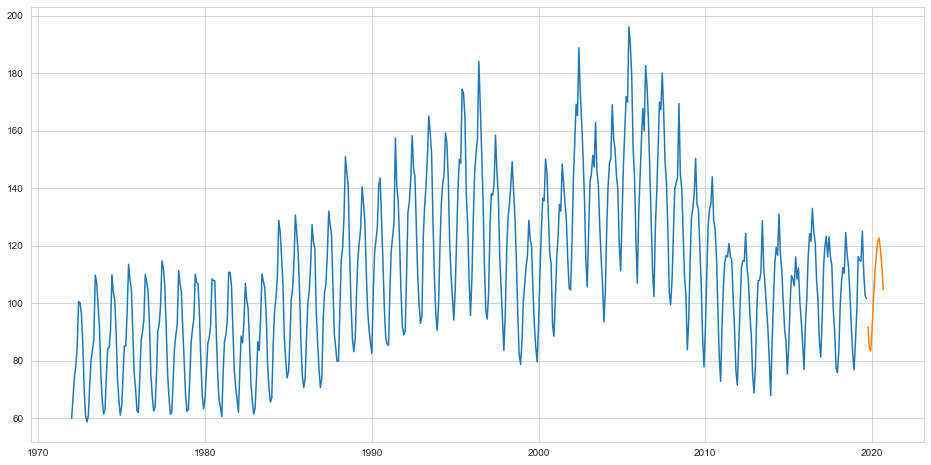

In [98]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['IPN31152N'])
plt.plot(forecast_df.index, forecast_df['Forecast']);
#plt.plot(forecast_index, forecast)

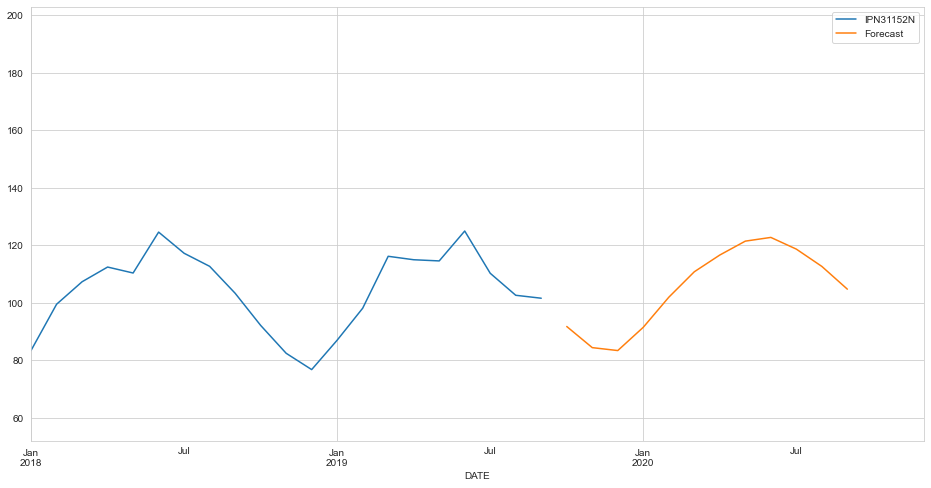

In [99]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01');